<a href="https://colab.research.google.com/github/adityanil10/Basic-Flag-Recognition-AI/blob/main/Basic_Flag_Recogntiton_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Gathering

In [ ]:
!pip install ipython-autotime
%load_ext autotime
!pip install bing-image-downloader
!mkdir flags
from bing_image_downloader import downloader
downloader.download("america national flag", limit=20, output_dir='flags', adult_filter_off=True)
downloader.download("canada national flag", limit=20, output_dir='flags', adult_filter_off=True)
downloader.download("india national flag", limit=20, output_dir='flags', adult_filter_off=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[%] Downloading Images to /content/flags/america national flag


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://images.pexels.com/photos/4386424/pexels-photo-4386424.jpeg?cs=srgb&amp;dl=pexels-karolina-grabowska-4386424.jpg&amp;fm=jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.nationalpedia.com/wp-content/uploads/2017/05/National-Flag-of-the-United-States.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://4.bp.blogspot.com/-CtBZ0q07Itw/VY4nDetKzcI/AAAAAAAAAiE/wrY2DVPq2t0/s1600/american-flag.png
[%] File Downloaded !

[%] Downloading Image #4 from http://www.rankflags.com/wp-content/uploads/2015/04/United-States-Flag-Image.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.wallpapersafari.com/9

# PreProcessing

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
flags = []
flat_data = []

DATADIR = '/content/flags'
CATEGORIES = ['america national flag', 'canada national flag', 'india national flag']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label Encoding Values
  path = os.path.join(DATADIR,category) # Create path to use all images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    flags.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
flags = np.array(flags)


time: 2min 19s (started: 2022-06-05 18:03:53 +00:00)


# Split Data Into Training And Testing

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.3, random_state = 107)
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001, 0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.9444444444444444

time: 46.7 s (started: 2022-06-05 18:06:13 +00:00)


# Save The Model using Pickle Library

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))
model = pickle.load(open('img_model.p','rb'))

time: 73.7 ms (started: 2022-06-05 18:07:00 +00:00)


# Testing a new Image

Enter Your URLhttps://d2v9ipibika81v.cloudfront.net/uploads/sites/16/15543041961_fdc9313e20_c.jpg
(527, 799, 3)
  PREDICTED OUTPUT : america national flag


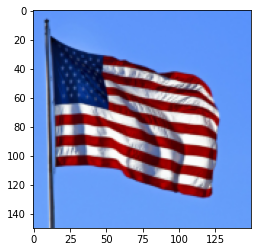

In [ ]:
flat_data = []
url = input('Enter Your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'  PREDICTED OUTPUT : {y_out}')

# Deployment In Web App Using Streamlit

In [ ]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

time: 1min 9s (started: 2022-06-05 18:07:00 +00:00)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 4.9 MB/s 
     |████████████████████████████████| 164 kB 52.7 MB/s 
     |████████████████████████████████| 77 kB 5.0 MB/s 
     |████████████████████████████████| 111 kB 49.6 MB/s 
     |████████████████████████████████| 4.3 MB 36.7 MB/s 
     |████████████████████████████████| 232 kB 67.2 MB/s 
     |████████████████████████████████| 181 kB 68.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 131 kB 54.4 MB/s 
     |████████████████████████████████| 428 kB 58.6 MB/s 
     |████████████████████████████████| 793 kB 57.7 MB/s 
     |████████████████████████████████| 130 kB 67.7 MB/s 
     |████████████████████████████████| 381 kB 72.3 MB/s 
     |████████████████████████████████| 51 kB 6.0 MB/s 
  Created wheel for blinker: filename=blinke

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 5.1 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=d64ae135a625370e5200765143ecb45c24685e4e927d464756495a76fec9c842
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok
time: 26 s (started: 2022-06-05 18:08:09 +00:00)


In [ ]:
%%writefile app.py
import streamlit as st
st.title('USA/CAD/IND Flag Classifier Using Machine Learning')

Writing app.py
time: 6.61 ms (started: 2022-06-05 18:08:35 +00:00)


In [ ]:
!nohup streamlit run app.py &

ngrok.set_auth_token("2AAUSCGSU95Tbm8IZFQNZif9BNB_4y2dtfoaEpS8czKPo3KAD")
url = ngrok.connect(8501,"http")
url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://bd9c-35-231-249-51.ngrok.io" -> "http://localhost:8501">

time: 1.82 s (started: 2022-06-05 18:08:35 +00:00)
